In [86]:
import yfinance as yf
from datetime import datetime
import pytz
import matplotlib.pyplot as plt

# Download ticker data
ticker = yf.download(tickers="MU", period="1d", interval="1m")

[*********************100%%**********************]  1 of 1 completed


In [87]:
# Print all columns
print(ticker.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [88]:
# Set start and end time
startTime = datetime.strptime("2024-06-27 09:30:00", "%Y-%m-%d %H:%M:%S")
endTime = datetime.strptime("2024-06-27 10:30:00", "%Y-%m-%d %H:%M:%S")

# Convert startTime and endTime to tz-aware datetime objects
tz = pytz.timezone('US/Eastern')
startTime = tz.localize(startTime)
endTime = tz.localize(endTime)

In [89]:
# Get data between start and end time, which has column names: Open, Close, High, Low
data = ticker.loc[startTime:endTime, ["Open", "Close", "High", "Low", "Volume"]]

# Round the columns to three decimal places
data[["Open", "Close", "High", "Low"]] = data[["Open", "Close", "High", "Low"]].round(3)

# Print data
print(data)

                              Open    Close     High     Low   Volume
Datetime                                                             
2024-06-27 09:30:00-04:00  135.620  134.360  136.690  134.07  6151752
2024-06-27 09:31:00-04:00  134.190  134.770  134.920  134.03   849068
2024-06-27 09:32:00-04:00  134.725  135.420  135.490  134.21   635116
2024-06-27 09:33:00-04:00  135.390  135.810  135.910  134.45   754497
2024-06-27 09:34:00-04:00  135.910  135.050  135.990  135.00   629809
...                            ...      ...      ...     ...      ...
2024-06-27 10:26:00-04:00  135.320  135.340  135.469  135.15   158287
2024-06-27 10:27:00-04:00  135.340  135.105  135.440  135.07   130185
2024-06-27 10:28:00-04:00  135.070  135.020  135.280  134.93   239186
2024-06-27 10:29:00-04:00  135.020  134.665  135.050  134.61   230848
2024-06-27 10:30:00-04:00  134.660  134.626  134.840  134.45   305783

[61 rows x 5 columns]


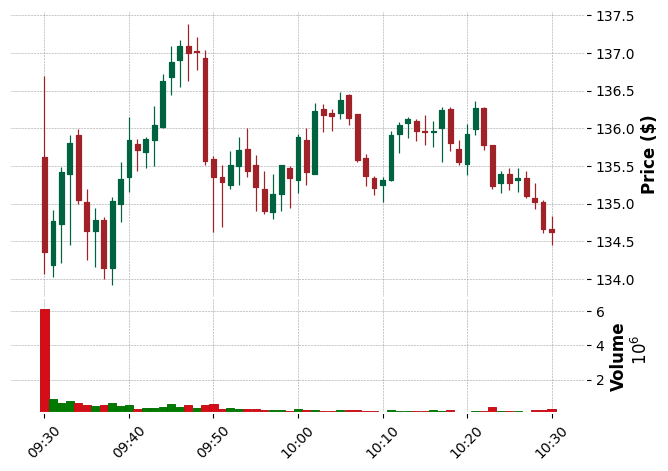

In [90]:
import mplfinance as mpf

# Assuming 'data' is a DataFrame with columns ['Open', 'High', 'Low', 'Close']
# and a DateTimeIndex

# Create a candlestick chart
mpf.plot(data, type='candle', style='charles',
         ylabel='Price ($)',
         ylabel_lower='Volume',
         volume=True)

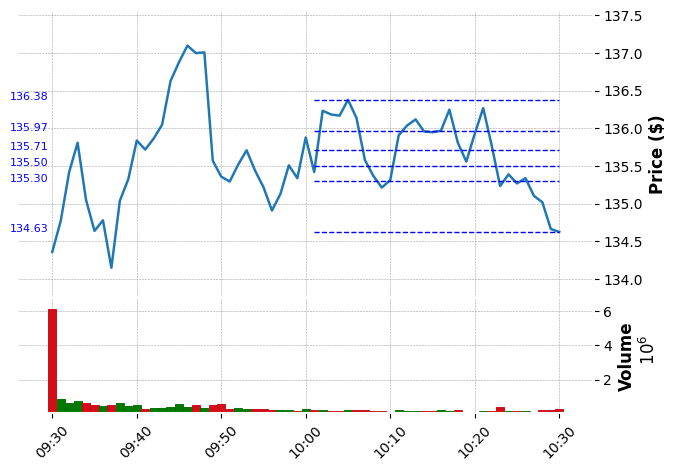

In [92]:
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt

# Assuming 'data' is defined earlier in your code

# Calculate Fibonacci Retracement Levels
max_price = data[-30:]['Close'].max()
min_price = data[-30:]['Close'].min()
difference = max_price - min_price

# Common Fibonacci Levels
levels = [0, 0.236, 0.382, 0.5, 0.618, 1]
fib_levels = [max_price - level * difference for level in levels]

# Create a list of tuples (level, price) for addplot
hlines = [(level, {'color': 'blue', 'linestyle': '--', 'width': 1}) for level in fib_levels]

# Calculate the index for the last 30 bars
last_30_index_start = len(data) - 30
last_30_index_end = len(data)

# Adjusted plotting code for Fibonacci levels
ap = []

# Loop to include lines for the last 30 bars
for level, style in hlines:
    # Create a line segment for the last 30 bars only
    level_data = [np.nan] * last_30_index_start + [level] * 30  # NaN for all but last 30
    ap.append(mpf.make_addplot(level_data, type='line', **style))

# Continue with the existing plotting call
fig, axlist = mpf.plot(data, type='line', style='charles', ylabel='Price ($)', ylabel_lower='Volume', volume=True, addplot=ap, returnfig=True)

# Add price labels for the last 30 bars
ax = axlist[0]  # Assuming the first axis is where you want to add the labels
for level in fib_levels:
    # Position text at the end of the dataset, adjusted for the last 30 bars
    ax.text(-5, level, f"{level:.2f}", color='blue', fontsize=8, ha='left')

plt.show()